# Phishing Website Detection by Machine Learning Techniques

## Loading Data

In [165]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [166]:
df = pd.read_csv('dataset_website.csv')

In [167]:
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


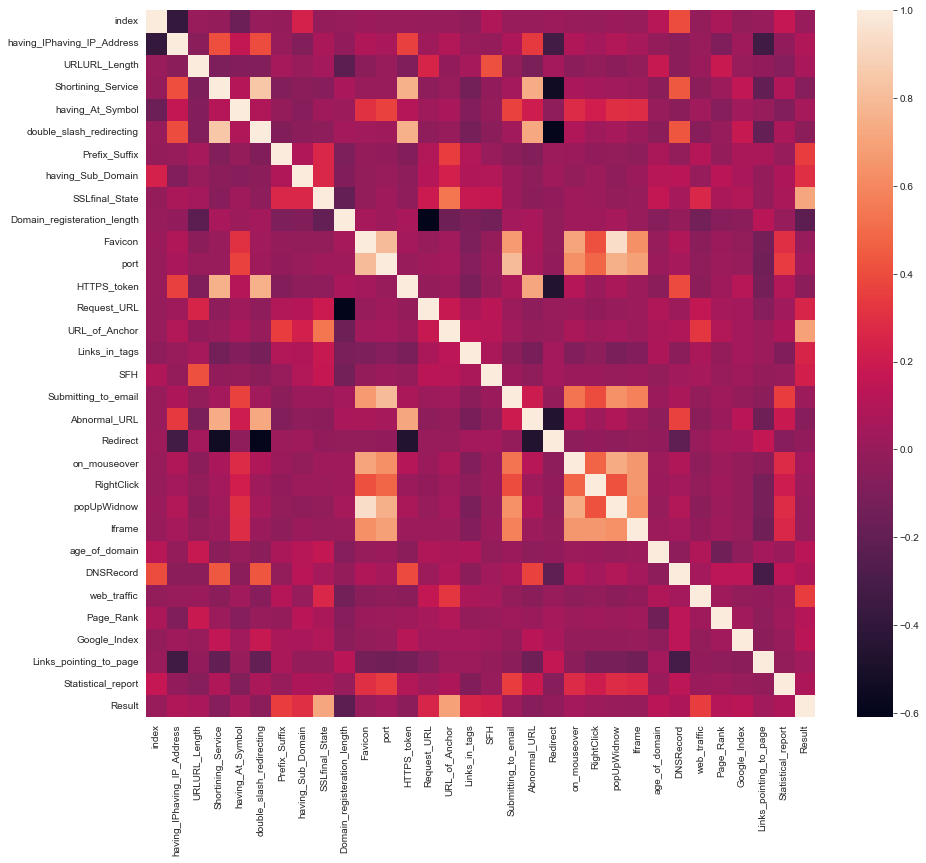

In [168]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [169]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Familiarizing with Data

In [170]:
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


In [171]:
df.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(df.columns))

26


In [172]:
l = [1,-1]
length = len(df)

In [173]:
for i in range(length):
  if(df['having_At_Symbol'].isnull().sum()):
    rand = random.randint(0,1)
    df['having_At_Symbol'][i] = l[rand]
  
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,1,-1,1,1,1,-1,1,1,1,-1


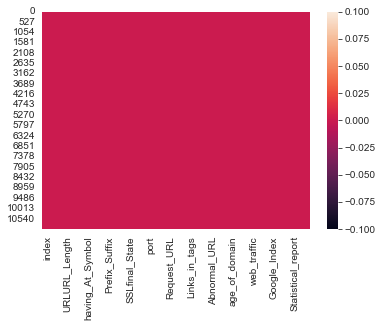

In [174]:
sns.heatmap(df.isnull())
plt.savefig('clean_heatmap.png')

<AxesSubplot:xlabel='having_At_Symbol', ylabel='count'>

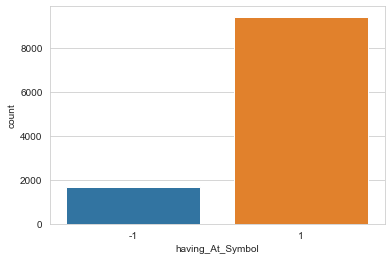

In [175]:
sns.set_style('whitegrid')
sns.countplot(x='having_At_Symbol',data=df)

<AxesSubplot:xlabel='having_IPhaving_IP_Address', ylabel='count'>

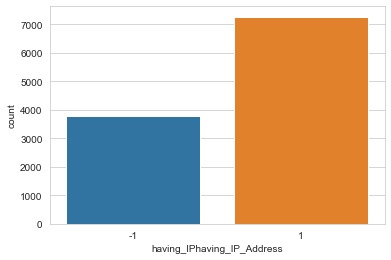

In [176]:
sns.countplot(x='having_IPhaving_IP_Address',data=df)

<AxesSubplot:xlabel='web_traffic', ylabel='count'>

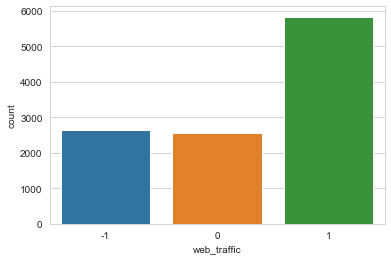

In [177]:
sns.countplot(x='web_traffic', data=df)

<AxesSubplot:xlabel='Result', ylabel='count'>

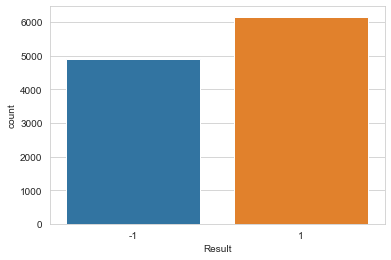

In [178]:
sns.countplot(x='Result', data=df)

<AxesSubplot:xlabel='Links_pointing_to_page', ylabel='count'>

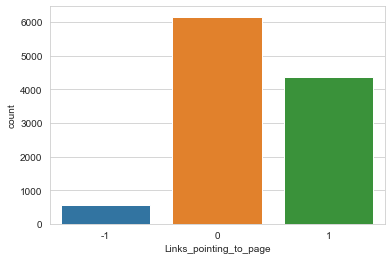

In [179]:
sns.countplot(x='Links_pointing_to_page', data=df)

<AxesSubplot:xlabel='Result', ylabel='count'>

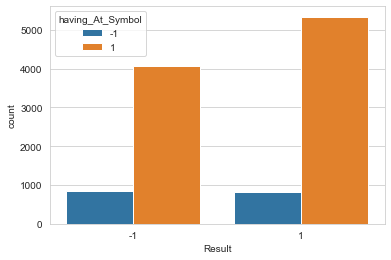

In [180]:
sns.countplot(x='Result', hue='having_At_Symbol', data=df)

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Result', ylabel='Density'>

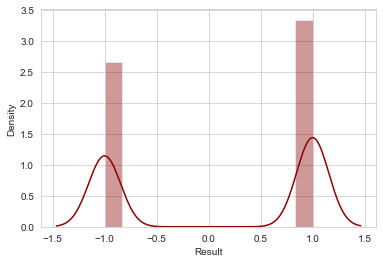

In [181]:
sns.distplot(df['Result'], color='darkred')

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Links_pointing_to_page', ylabel='Density'>

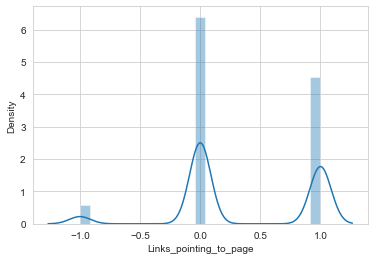

In [182]:
sns.distplot(df['Links_pointing_to_page'])

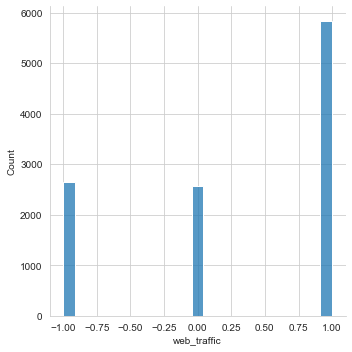

In [183]:
sns.displot(df['web_traffic'])

In [184]:
a=len(df[df.Result==0])
b=len(df[df.Result==-1])
c=len(df[df.Result==1])

In [185]:
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  4898
Count of Suspicious Websites =  0
Count of Phishy Websites =  6157


In [186]:
df.drop(['index'],axis=1,inplace=True)
print(len(df.columns))

25


##  Visualizing the data

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

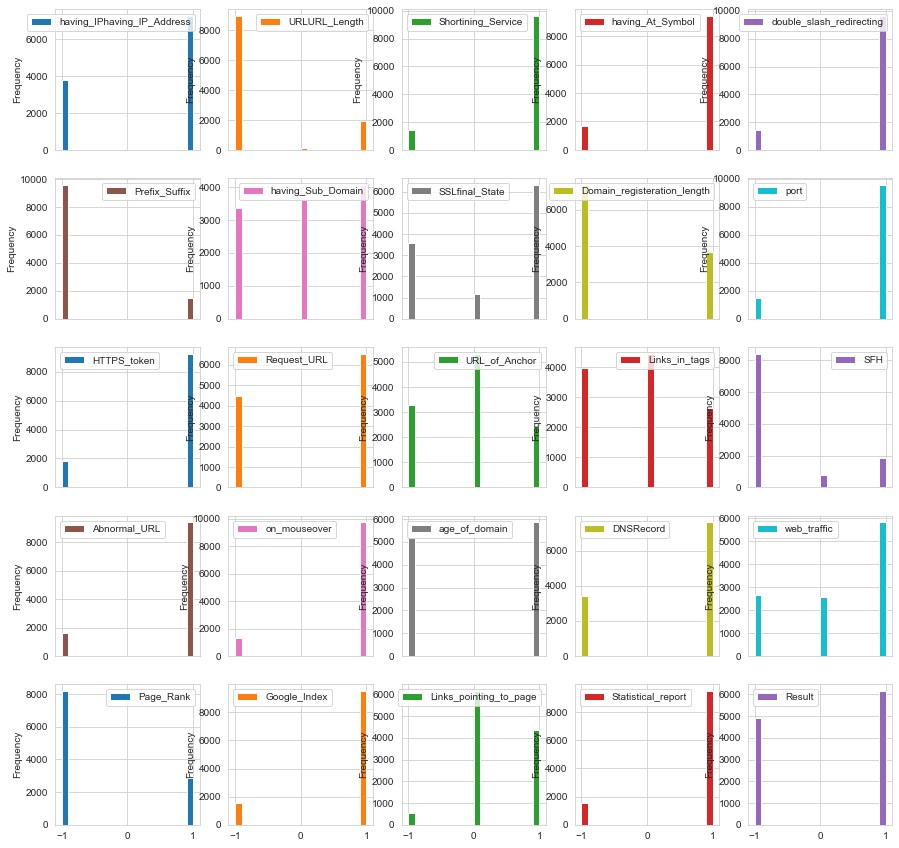

In [187]:
df.plot.hist(subplots=True,layout=(5,5),figsize=(15, 15), bins=20)

In [188]:
df.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.060979,...,0.336549,0.084059,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,0.000323,...,-0.106761,-0.045103,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.002201,...,0.739290,0.062383,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.364891,...,0.203945,0.279697,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.025060,...,0.723724,0.086635,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.022546,...,-0.077620,0.012578,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,0.004863,...,-0.034908,-0.018082,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,0.027473,...,-0.046245,0.023586,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.022478,...,0.058109,0.023784,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
port,0.060979,0.000323,0.002201,0.364891,0.025060,-0.022546,0.004863,0.027473,0.022478,1.000000,...,0.054126,0.623298,0.008459,0.054849,-0.028543,0.017954,-0.005413,-0.139104,0.343987,0.036419


## Splitting the Data

In [189]:
from sklearn.model_selection import train_test_split,cross_val_score

In [190]:
X= df.drop(columns='Result')
X


,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,-1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,-1,-1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,-1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,0,-1,-1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,-1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,1,...,-1,1,-1,1,1,1,-1,1,1,1


In [191]:
Y=df['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,-1
1,-1
2,-1
3,-1
4,1


In [192]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.40,random_state=10)

In [193]:
print("Training set has {} samples.".format(train_X.shape[0]))
print("Testing set has {} samples.".format(test_X.shape[0]))

Training set has 6633 samples.
Testing set has 4422 samples.


# Machine Learning Models & Training

In [194]:
from sklearn.metrics import accuracy_score

In [195]:
ML_Model = []
acc_train = []
acc_test = []


def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## LogisticRegression

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [197]:
logreg=LogisticRegression()
model_1=logreg.fit(train_X,train_Y)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
logreg_predict= model_1.predict(test_X)

In [199]:
print('The accurcy of Logistic Regression Model is : ', 100.0 * accuracy_score(logreg_predict,test_Y))

The accurcy of Logistic Regression Model is :  92.76345545002262


In [200]:
print(classification_report(logreg_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92      1866
           1       0.95      0.93      0.94      2556

    accuracy                           0.93      4422
   macro avg       0.92      0.93      0.93      4422
weighted avg       0.93      0.93      0.93      4422



In [201]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()


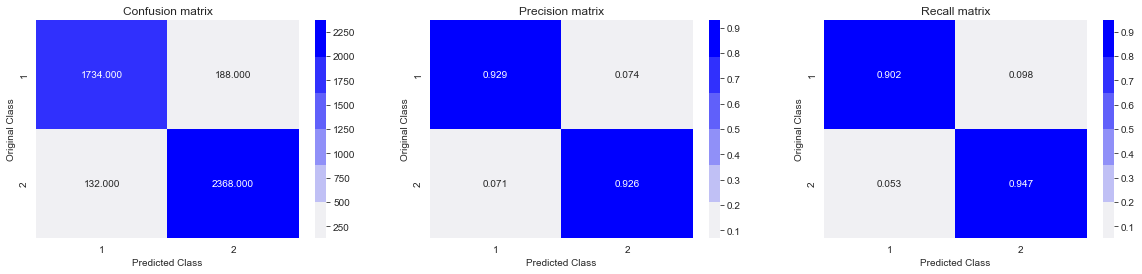

In [202]:
plot_confusion_matrix(test_Y, logreg_predict)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


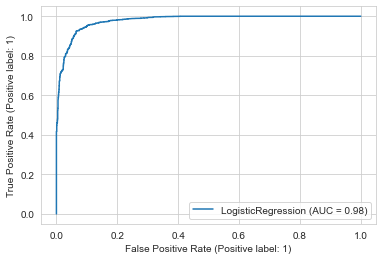

In [203]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model_1,test_X, test_Y)

## K-NeighborsClassifier

In [204]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
error = []
for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(train_X, train_Y.values.ravel())
  pred_i = knn.predict(test_X)
  error.append(np.mean(pred_i != test_Y.values.ravel()))

Text(0, 0.5, 'Error Rate')

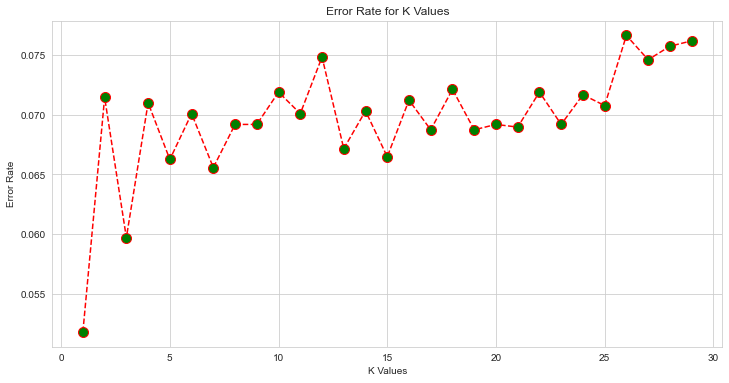

In [206]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate for K Values')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

In [207]:
knn=KNeighborsClassifier(n_neighbors=1)
model_2= knn.fit(train_X,train_Y)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [208]:
knn_predict=model_2.predict(test_X)

In [209]:
print('The accuracy of KNN Model is: ', 100.0 * accuracy_score(knn_predict,test_Y))

The accuracy of KNN Model is:  94.82134780642242


In [210]:
print(classification_report(test_Y,knn_predict))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1922
           1       0.96      0.95      0.95      2500

    accuracy                           0.95      4422
   macro avg       0.95      0.95      0.95      4422
weighted avg       0.95      0.95      0.95      4422



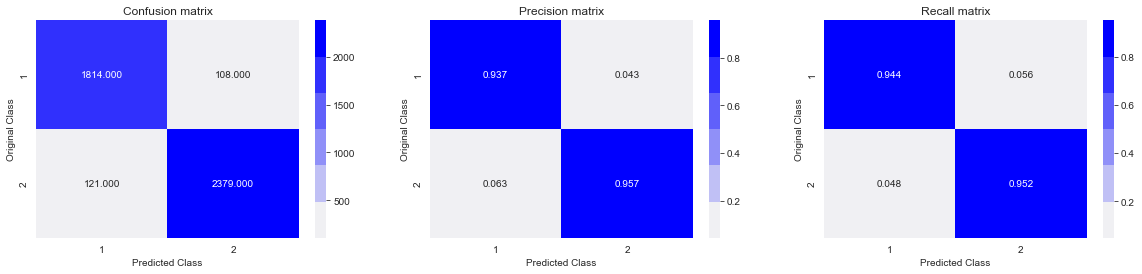

In [211]:
plot_confusion_matrix(test_Y, knn_predict)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


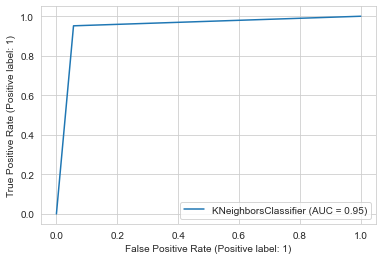

In [212]:
plot_roc_curve(model_2,test_X, test_Y)

##  DecisionTreeClassifier

In [213]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
dtree=DecisionTreeClassifier()
model_3=dtree.fit(train_X,train_Y)


In [215]:
dtree_predict=model_3.predict(test_X)

In [216]:
print('The accuracy of Decision Tree Classifier is: ', 100.0 * accuracy_score(dtree_predict,test_Y))

The accuracy of Decision Tree Classifier is:  95.92944369063771


In [217]:
print(classification_report(dtree_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95      1922
           1       0.96      0.96      0.96      2500

    accuracy                           0.96      4422
   macro avg       0.96      0.96      0.96      4422
weighted avg       0.96      0.96      0.96      4422



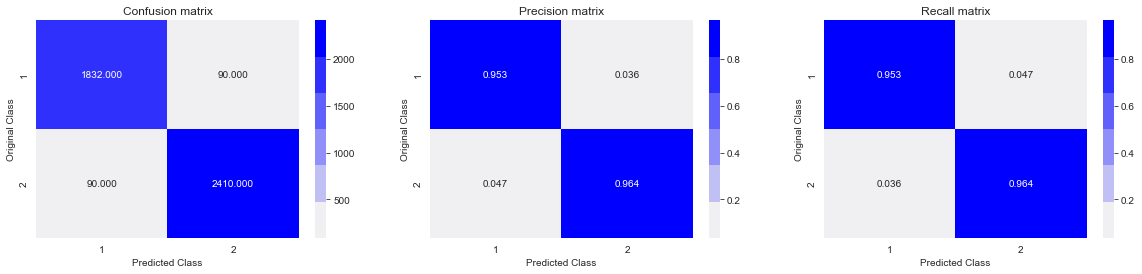

In [218]:
plot_confusion_matrix(test_Y, dtree_predict)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


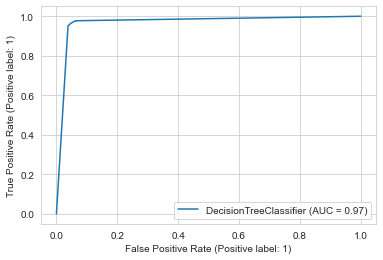

In [219]:
plot_roc_curve(model_3,test_X, test_Y)

## RandomForestClassifier

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_3196\1551461989.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4=rfc.fit(train_X,train_Y)


In [222]:
rfc_predict=model_4.predict(test_X)

In [223]:
print('The accuracy of Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,test_Y))

The accuracy of Random Forest Classifier is:  97.01492537313433


In [224]:
print(classification_report(rfc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1892
           1       0.98      0.97      0.97      2530

    accuracy                           0.97      4422
   macro avg       0.97      0.97      0.97      4422
weighted avg       0.97      0.97      0.97      4422



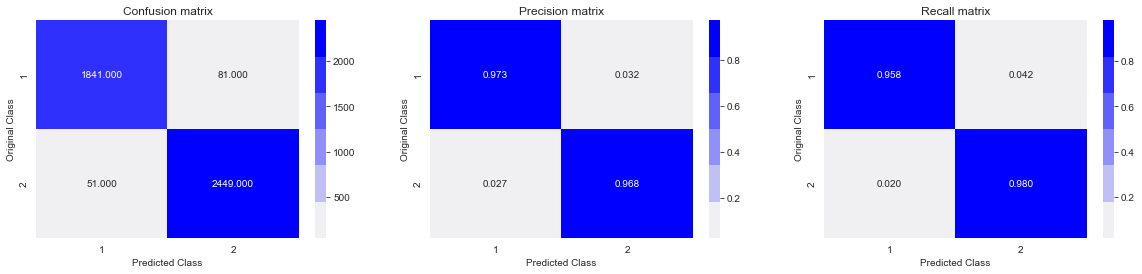

In [225]:
plot_confusion_matrix(test_Y, rfc_predict)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


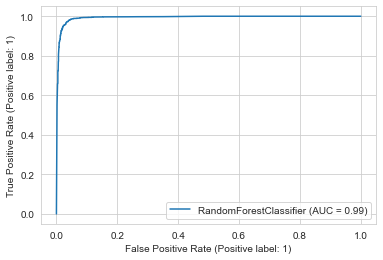

In [226]:
plot_roc_curve(model_4,test_X, test_Y)

## Support Vector Machine

In [227]:
from sklearn.svm import SVC

In [228]:
svc=SVC()
model_5=svc.fit(train_X,train_Y)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [229]:
svm_predict=model_5.predict(test_X)

In [230]:
print('The accuracy of SVM Classifier is: ', 100.0 * accuracy_score(svm_predict,test_Y))

The accuracy of SVM Classifier is:  94.4142921754862


In [231]:
print(classification_report(svm_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.92      0.95      0.93      1859
           1       0.96      0.94      0.95      2563

    accuracy                           0.94      4422
   macro avg       0.94      0.95      0.94      4422
weighted avg       0.94      0.94      0.94      4422



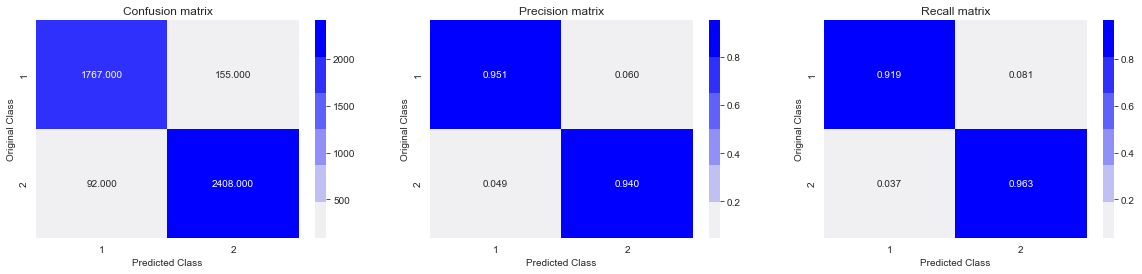

In [232]:
plot_confusion_matrix(test_Y, svm_predict)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


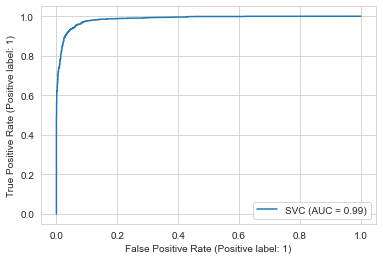

In [233]:
plot_roc_curve(model_5,test_X, test_Y)

In [234]:
from sklearn.ensemble import AdaBoostClassifier

In [235]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_6=adc.fit(train_X,train_Y)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [236]:
adc_predict=model_6.predict(test_X)

In [237]:
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(adc_predict,test_Y))

The accuracy of Ada Boost Classifier is:  91.42921754862053


In [238]:
print(classification_report(adc_predict,test_Y))

              precision    recall  f1-score   support

          -1       0.90      0.90      0.90      1919
           1       0.92      0.92      0.92      2503

    accuracy                           0.91      4422
   macro avg       0.91      0.91      0.91      4422
weighted avg       0.91      0.91      0.91      4422



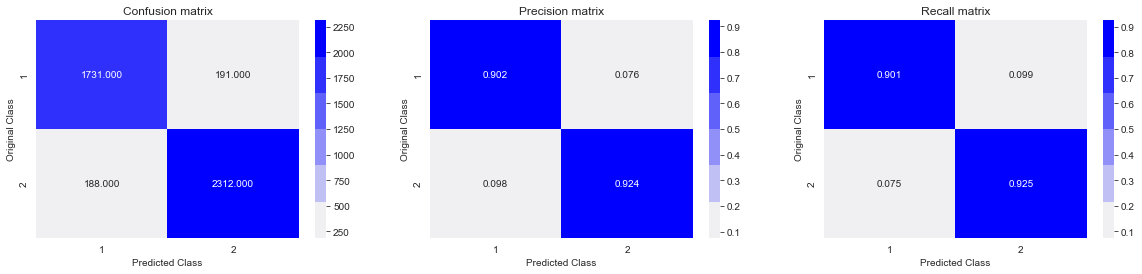

In [239]:
plot_confusion_matrix(test_Y, adc_predict)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


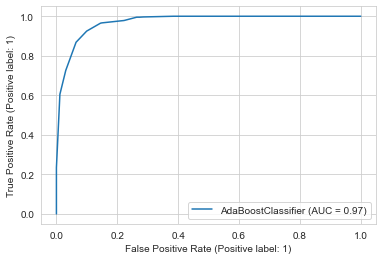

In [240]:
plot_roc_curve(model_6,test_X, test_Y)

## comparision of Models

In [241]:
print('Logistic Regression Accuracy:',100 * accuracy_score(logreg_predict,test_Y))
print('K-Nearest Neighbour Accuracy:',100* accuracy_score(knn_predict,test_Y))
print('Decision Tree Classifier Accuracy:',100* accuracy_score(dtree_predict,test_Y))
print('Random Forest Classifier Accuracy:',100*accuracy_score(rfc_predict,test_Y))
print('support Vector Machine Accuracy:',100*accuracy_score(svm_predict,test_Y))
print('Adaboost Classifier Accuracy:',100*accuracy_score(adc_predict,test_Y))


Logistic Regression Accuracy: 92.76345545002262
K-Nearest Neighbour Accuracy: 94.82134780642242
Decision Tree Classifier Accuracy: 95.92944369063771
Random Forest Classifier Accuracy: 97.01492537313433
support Vector Machine Accuracy: 94.4142921754862
Adaboost Classifier Accuracy: 91.42921754862053


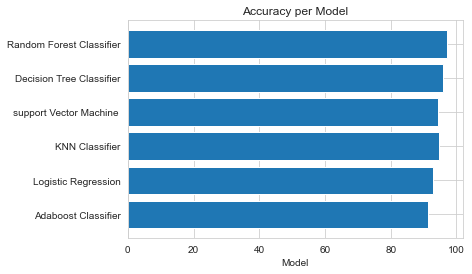

<Figure size 432x288 with 0 Axes>

In [243]:
objects = ('Adaboost Classifier', 'Logistic Regression', 'KNN Classifier', 'support Vector Machine ', 'Decision Tree Classifier', 'Random Forest Classifier')
y_pos = np.arange(len(objects))
performance = [91.42921754862053,92.76345545002262,94.82134780642242,94.4142921754862,95.92944369063771,97.01492537313433]
plt.barh(y_pos, performance, align='center', alpha=1.0)
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy per Model')

plt.show()
plt.savefig('accuracy_per_model.png')